In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import spotipy 
import librosa
import librosa.display
import numpy as np
import matplotlib as mpl
import urllib.request
import seaborn as sns
import tqdm
import scipy
import joblib
import os.path
from pathlib import Path
from IPython.display import Audio, Markdown, Image
from spotipy.oauth2 import SpotifyClientCredentials

# Números y Datos
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.interpolate import interp1d

# Análisis de sonido
import librosa
import librosa.display
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials 

# Machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from sklearn.preprocessing import quantile_transform

# Styles
sns.set_context('poster')
sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [2]:
#df_merged_all = pd.read_pickle('../sources/df_merged_all_quantiles_mediana_iqr.pickle')
df_merged_all = pd.read_pickle('../sources/df_todo_1_Uniform.pickle')
len(df_merged_all)
#df_num = df_merged_all
#df_merged_all.head(3).T.tail(20)

4082

In [3]:
df_num = df_merged_all.drop(['af_instrumentalness','af_mode','af_popularity','af_time_signature','af_key'],1)#.drop(['af_instrumentalness','af_mode','af_popularity','af_time_signature','af_key'],1)

cols = [c for c in df_num.columns if c.lower()[:3] == 'aa_']
df_num=df_num[cols]
df_num = df_num.rename(columns={col:col[3:] for col in df_num.columns})
df_num['genre']=df_merged_all['genre']

#df_num = df_num.rename(columns={'re':'genero'})
#df_num.columns

list(df_num.columns)

['confidence_mediana',
 'loudness_start_mediana',
 'loudness_max_time_mediana',
 'loudness_max_mediana',
 'loudness_end_mediana',
 'p00_C_mediana',
 'p01_C#_mediana',
 'p02_D_mediana',
 'p03_D#_mediana',
 'p04_E_mediana',
 'p05_F_mediana',
 'p06_F#_mediana',
 'p07_G_mediana',
 'p08_G#_mediana',
 'p09_A_mediana',
 'p10_A#_mediana',
 'p11_B_mediana',
 't00_mediana',
 't01_mediana',
 't02_mediana',
 't03_mediana',
 't04_mediana',
 't05_mediana',
 't06_mediana',
 't07_mediana',
 't08_mediana',
 't09_mediana',
 't10_mediana',
 't11_mediana',
 'confidence_iqr',
 'loudness_start_iqr',
 'loudness_max_time_iqr',
 'loudness_max_iqr',
 'loudness_end_iqr',
 'p00_C_iqr',
 'p01_C#_iqr',
 'p02_D_iqr',
 'p03_D#_iqr',
 'p04_E_iqr',
 'p05_F_iqr',
 'p06_F#_iqr',
 'p07_G_iqr',
 'p08_G#_iqr',
 'p09_A_iqr',
 'p10_A#_iqr',
 'p11_B_iqr',
 't00_iqr',
 't01_iqr',
 't02_iqr',
 't03_iqr',
 't04_iqr',
 't05_iqr',
 't06_iqr',
 't07_iqr',
 't08_iqr',
 't09_iqr',
 't10_iqr',
 't11_iqr',
 'confidence_dif_mediana',
 'l

In [5]:
def plot_radar_chart_stats(s25,s50,s75,color,ax):
    grupo=s25.name
    labels = s25.index

    angles=np.linspace(0, 2*np.pi, len(s25), endpoint=False)
    angles=np.append(angles,angles[0])
    s25=np.append(s25,s25[0])
    s50=np.append(s50,s50[0])
    s75=np.append(s75,s75[0])

    ax.plot(angles, s50, 'o-', linewidth=1,color=color,markersize=4)
    ax.set_yticklabels([])
    ax.set_thetagrids(angles * 180/np.pi, labels, fontsize=5, color='gray')
    ax.tick_params(pad=-6, direction='out', length=4, color='k', zorder=-1)
    ax.fill_between(angles, s25, s75, alpha=0.2,color=color)
    ax.set_title(grupo, fontsize=12, loc='left')
    ax.grid(True)
    ax.set_ylim(0,1)


In [6]:
grouped = df_num.groupby('genre')

normalized_stats_25_ = grouped.quantile(.25)
normalized_stats_50_ = grouped.quantile(.5)
normalized_stats_75_ = grouped.quantile(.75)
df_num.head(20)

,confidence_mediana,loudness_start_mediana,loudness_max_time_mediana,loudness_max_mediana,loudness_end_mediana,p00_C_mediana,p01_C#_mediana,p02_D_mediana,p03_D#_mediana,p04_E_mediana,...,t11_dif_iqr,pitch_dif_mediana,pitch_dif_iqr,pitch_mediana,pitch_iqr,timbre_dif_mediana,timbre_dif_iqr,timbre_mediana,timbre_iqr,genre
id,,,,,,,,,,,,,,,,,,,,,
4d3XHYFFuYYzxWr2cJ6yQl,0.967474,0.079165,0.121319,0.172266,0.0,0.134176,0.028520,0.029040,0.087542,0.399711,...,0.491252,0.473879,0.184635,0.023096,0.045687,0.868210,0.652999,0.344643,0.936381,jazz
3X3p3u03P8eFL8WTH0oaaU,0.834596,0.218877,0.487153,0.268072,0.0,0.233605,0.314040,0.155303,0.098485,0.113442,...,0.545455,0.268316,0.624165,0.065758,0.084597,0.478402,0.710647,0.419566,0.732306,jazz
4KlXeaheot0OI9PoOWspvZ,0.955623,0.258710,0.690679,0.398774,0.0,0.194633,0.110334,0.189675,0.161616,0.370130,...,0.055794,0.402962,0.474025,0.096340,0.476744,0.536099,0.839182,0.190657,0.983901,jazz
3j76McoUI18gDoqxYE14Bu,0.782492,0.247528,0.120573,0.275814,0.0,0.242424,0.652076,0.598204,0.483405,0.979798,...,0.892868,0.657293,0.603615,0.724723,0.783911,0.487373,0.939980,0.057123,0.791332,jazz
4zxd4tiXPlWMqoJltbVTbE,0.871843,0.228805,0.613735,0.292098,0.0,0.110269,0.107226,0.244242,0.208754,0.082071,...,0.504287,0.180000,0.236572,0.072014,0.102416,0.267625,0.598742,0.459125,0.980818,jazz
4LInRUJ6XN1TVnoRVAFcdB,0.971797,0.086447,0.194777,0.183487,0.0,1.000000,0.815744,0.519162,0.200337,0.085859,...,0.480688,0.056262,0.350254,0.334120,0.029316,0.792929,0.803821,0.476667,0.940807,jazz
16QhvfPMBLpo7sFqOqTff3,0.531746,0.327450,0.665633,0.305937,0.0,0.083172,0.081818,0.257985,0.046465,0.027706,...,0.037932,0.467657,0.225754,0.012399,0.023981,0.043887,0.578212,0.147646,0.637678,jazz
2kF9Ijd7I2Kk2P4bYqUmzG,0.983413,0.187801,0.266540,0.343677,0.0,0.304058,0.114996,0.052525,0.104798,0.099747,...,0.677175,0.392076,0.724058,0.151073,0.289077,0.219433,0.903448,0.127327,0.752354,jazz
7pKWTcPfT9mg2iAhobFHpS,0.986086,0.198796,0.204244,0.374812,0.0,0.059596,0.088889,0.126263,0.027417,0.120435,...,0.171223,0.471791,0.158749,0.015216,0.057797,0.090227,0.360094,0.259385,0.605324,jazz


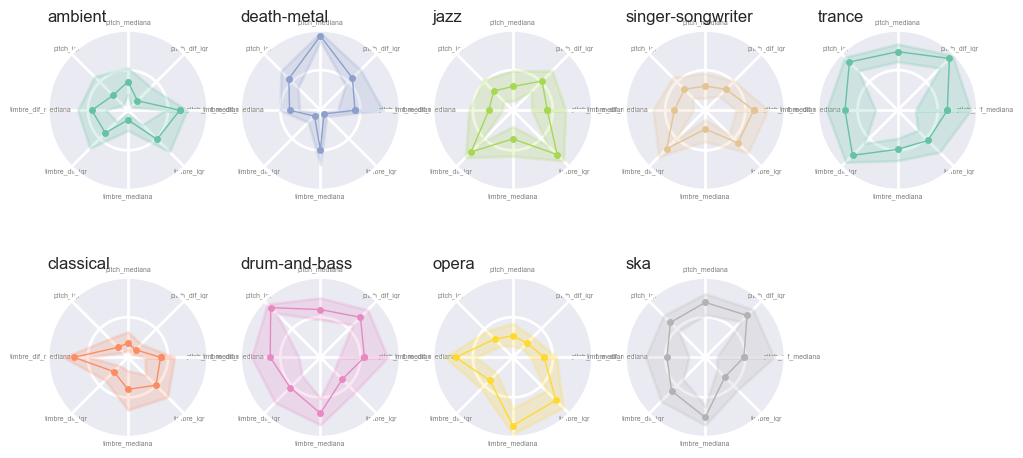

In [7]:
cols = [c for c in df_num.columns if 'timbre' in c or 'pitch' in c or 'pitch' in c]
normalized_stats_25=normalized_stats_25_[cols]
normalized_stats_50=normalized_stats_50_[cols]
normalized_stats_75=normalized_stats_75_[cols]

rows=2
my_palette = sns.color_palette("Set2")
q = int(len(normalized_stats_25)/rows)+len(normalized_stats_25)%rows
fig, axs = plt.subplots(rows, q, subplot_kw=dict(polar=True))

for i in range(rows*q):
    if i<len(normalized_stats_25):
        plot_radar_chart_stats(normalized_stats_25.iloc[i],
                               normalized_stats_50.iloc[i],
                               normalized_stats_75.iloc[i],
                               my_palette[i%8],axs[i%rows, int(i/rows)])
    else:
        fig.delaxes(axs[i%rows, int(i/rows)])

#plt.savefig('radar_chart_characteristics_audio_analysis.png',dpi=800, bbox_inches = 'tight', pad_inches = 0)
#plt.show()

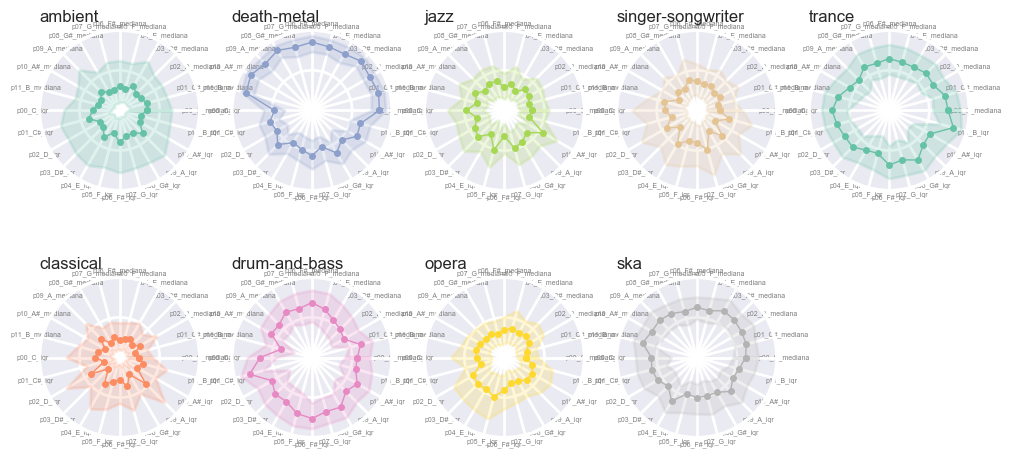

In [46]:
cols = [c for c in df_num.columns if c.lower()[:1] == 'p' and  not '_dif_' in c]
normalized_stats_25=normalized_stats_25_[cols]
normalized_stats_50=normalized_stats_50_[cols]
normalized_stats_75=normalized_stats_75_[cols]

rows=2
my_palette = sns.color_palette("Set2")
q = int(len(normalized_stats_25)/rows)+len(normalized_stats_25)%rows
fig, axs = plt.subplots(rows, q, subplot_kw=dict(polar=True))

for i in range(rows*q):
    if i<len(normalized_stats_25):
        plot_radar_chart_stats(normalized_stats_25.iloc[i],
                               normalized_stats_50.iloc[i],
                               normalized_stats_75.iloc[i],
                               my_palette[i%8],axs[i%rows, int(i/rows)])
    else:
        fig.delaxes(axs[i%rows, int(i/rows)])

#plt.savefig('radar_chart_characteristics_audio_analysis.png',dpi=800, bbox_inches = 'tight', pad_inches = 0)
#plt.show()

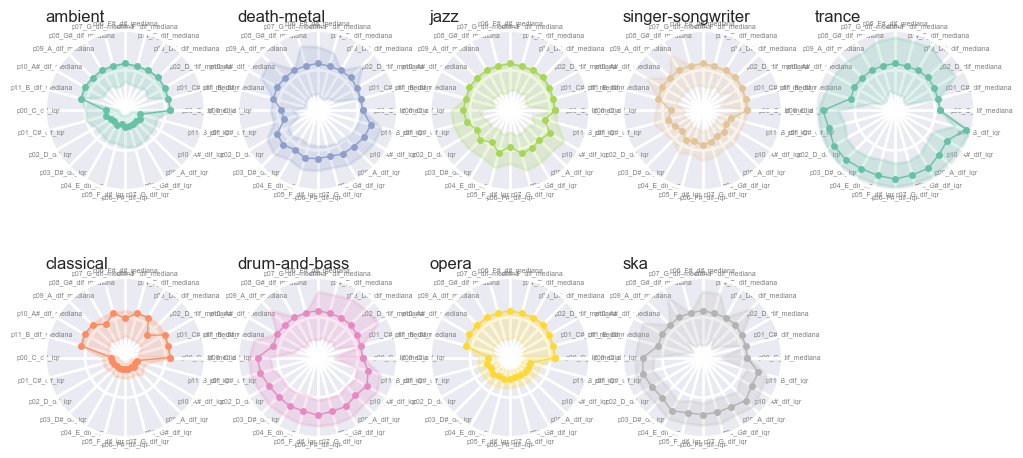

In [47]:
cols = [c for c in df_num.columns if c.lower()[:1] == 'p' and  '_dif_' in c]
normalized_stats_25=normalized_stats_25_[cols]
normalized_stats_50=normalized_stats_50_[cols]
normalized_stats_75=normalized_stats_75_[cols]

rows=2
my_palette = sns.color_palette("Set2")
q = int(len(normalized_stats_25)/rows)+len(normalized_stats_25)%rows
fig, axs = plt.subplots(rows, q, subplot_kw=dict(polar=True))

for i in range(rows*q):
    if i<len(normalized_stats_25):
        plot_radar_chart_stats(normalized_stats_25.iloc[i],
                               normalized_stats_50.iloc[i],
                               normalized_stats_75.iloc[i],
                               my_palette[i%8],axs[i%rows, int(i/rows)])
    else:
        fig.delaxes(axs[i%rows, int(i/rows)])

#plt.savefig('radar_chart_characteristics_audio_analysis.png',dpi=800, bbox_inches = 'tight', pad_inches = 0)
#plt.show()

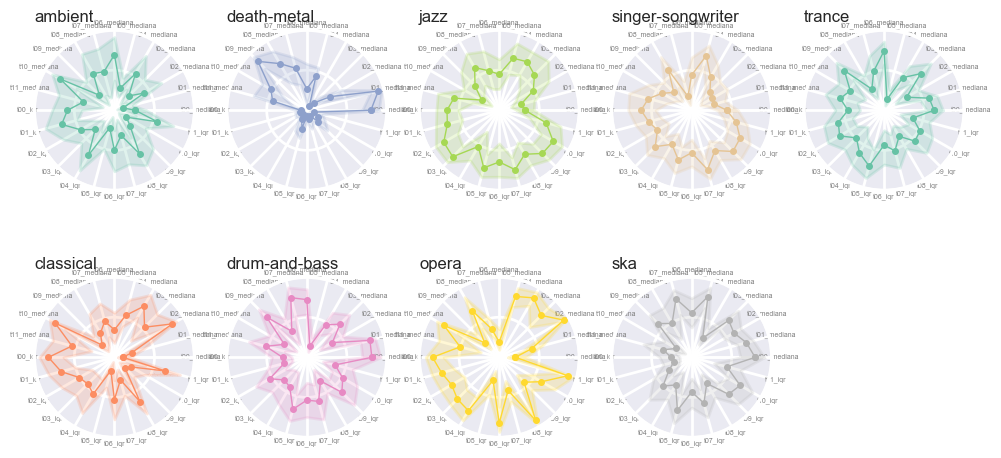

In [48]:
cols = [c for c in df_num.columns if c.lower()[:1] == 't' and not '_dif_' in c]
normalized_stats_25=normalized_stats_25_[cols]
normalized_stats_50=normalized_stats_50_[cols]
normalized_stats_75=normalized_stats_75_[cols]

rows=2
my_palette = sns.color_palette("Set2")
q = int(len(normalized_stats_25)/rows)+len(normalized_stats_25)%rows
fig, axs = plt.subplots(rows, q, subplot_kw=dict(polar=True))

for i in range(rows*q):
    if i<len(normalized_stats_25):
        plot_radar_chart_stats(normalized_stats_25.iloc[i],
                               normalized_stats_50.iloc[i],
                               normalized_stats_75.iloc[i],
                               my_palette[i%8],axs[i%rows, int(i/rows)])
    else:
        fig.delaxes(axs[i%rows, int(i/rows)])

#plt.savefig('radar_chart_characteristics_audio_analysis.png',dpi=800, bbox_inches = 'tight', pad_inches = 0)
#plt.show()

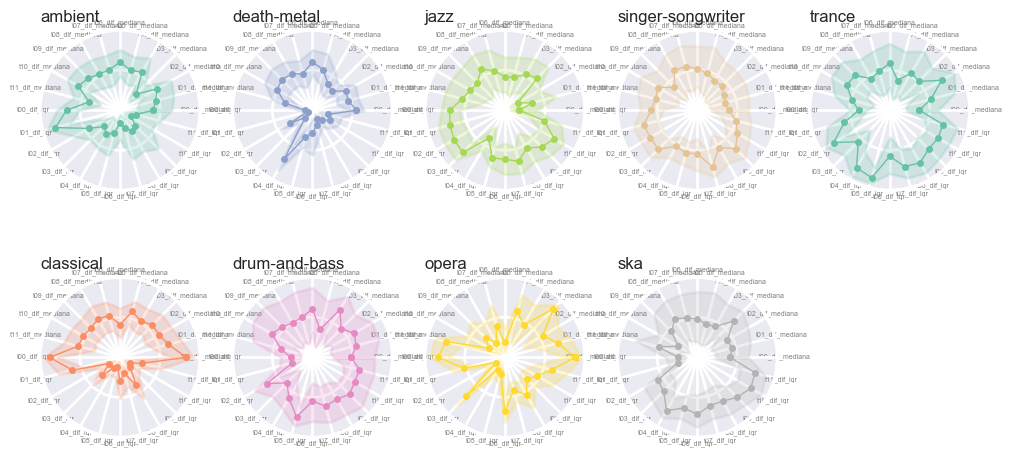

In [49]:
cols = [c for c in df_num.columns if c.lower()[:1] == 't' and  '_dif_' in c]
normalized_stats_25=normalized_stats_25_[cols]
normalized_stats_50=normalized_stats_50_[cols]
normalized_stats_75=normalized_stats_75_[cols]

rows=2
my_palette = sns.color_palette("Set2")
q = int(len(normalized_stats_25)/rows)+len(normalized_stats_25)%rows
fig, axs = plt.subplots(rows, q, subplot_kw=dict(polar=True))

for i in range(rows*q):
    if i<len(normalized_stats_25):
        plot_radar_chart_stats(normalized_stats_25.iloc[i],
                               normalized_stats_50.iloc[i],
                               normalized_stats_75.iloc[i],
                               my_palette[i%8],axs[i%rows, int(i/rows)])
    else:
        fig.delaxes(axs[i%rows, int(i/rows)])

#plt.savefig('radar_chart_characteristics_audio_analysis.png',dpi=800, bbox_inches = 'tight', pad_inches = 0)
#plt.show()